<a href="https://colab.research.google.com/github/Sirfowahid/Demo/blob/main/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-983af0ed3a2d>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
train_ds = pd.read_csv('/content/drive/MyDrive/Projects/03. Demo /Training.csv')
test_ds = pd.read_csv('/content/drive/MyDrive/Projects/03. Demo /Testing.csv')

In [4]:
train_ds.head(5)

Training      Aspect    Rainfall  SOIL          TWI       SPI     Slope  \
0         1   74.744904  540.265991     2   -38.351200 -0.547888  11.40180   
1         1  329.036011  535.432983     2    68.288696  0.173995   5.83095   
2         1  246.800995  535.414002     2   -77.526604 -0.425340   7.61577   
3         1   -1.000000  535.929016     2 -3858.179932 -0.012853   0.00000   
4         1  296.565002  535.982971     2  -129.878998 -0.254116   4.47214   

       NDIV  Landuse  Geological  Elevation          Dd  Curvature  
0 -0.112100  1.00000     8.00000       2340  137.927002       1.28  
1 -0.060369  2.00000     6.00000       2354  124.690002      -1.28  
2 -0.091166  2.00000     7.88829       2340  130.602997       0.64  
3 -0.129268  3.70415     8.00000       2325  134.162994       0.00  
4 -0.136156  3.58101     8.00000       2324  135.453995       1.28

In [5]:
test_ds.head(5)

Testing      Aspect    Rainfall  SOIL        TWI       SPI    Slope  \
0        1  135.000000  540.505005     2  15.169900  0.098235  5.65685   
1        1  168.690002  536.140991     2 -16.409100 -0.048734  5.09902   
2        1   18.434900  540.650024     1 -25.545799 -0.065033  6.32456   
3        1  116.565002  548.835998     2  39.830502  0.069496  4.47214   
4        1  270.000000  549.638000     2  24.875200  0.041922  4.00000   

       NDIV  Landuse  Geological  Elevation          Dd  Curvature  
0 -0.110534  1.00000         8.0       2364  140.395996      -1.28  
1 -0.162712  4.00000         8.0       2353  128.998001      -0.64  
2 -0.190159  4.00000         8.0       2389  139.481003       0.00  
3 -0.101532  1.00000         2.0       2387  137.354996      -1.28  
4 -0.103895  1.00826         8.0       2331  136.141998      -0.64

In [6]:
train_ds.dtypes

Training        int64
Aspect        float64
Rainfall      float64
SOIL            int64
TWI           float64
SPI           float64
Slope         float64
NDIV          float64
Landuse       float64
Geological    float64
Elevation       int64
Dd            float64
Curvature     float64
dtype: object

In [7]:
train_ds.describe()

Training      Aspect    Rainfall        SOIL          TWI  \
count  281.000000  281.000000  281.000000  281.000000   281.000000   
mean     0.483986  160.058085  540.170548    1.943060  -234.978993   
std      0.500635  108.936363    5.418798    0.261103   920.679393   
min      0.000000   -1.000000  533.330017    1.000000 -6850.680176   
25%      0.000000   64.440002  536.487976    2.000000  -102.877998   
50%      0.000000  164.475998  537.666992    2.000000    -6.042410   
75%      1.000000  246.800995  541.114014    2.000000    16.610600   
max      1.000000  351.869995  552.697022    3.000000   605.495972   

              SPI       Slope        NDIV     Landuse  Geological  \
count  281.000000  281.000000  281.000000  281.000000  281.000000   
mean    -0.083016    8.373099   -0.102666    1.790849    6.970159   
std      0.416844   10.339494    0.036006    1.108099    1.760197   
min     -3.765120    0.000000   -0.297929    1.000000    0.837972   
25%     -0.233989    3.162280   -0.112340    1.000000    6.000000   
50%     -0.012721    5.099020   -0.096271    1.000000    8.000000   
75%      0.074432    8.944270   -0.082163    2.704150    8.000000   
max      1.969030   72.498299   -0.038333    4.000000    8.000000   

         Elevation          Dd   Curvature  
count   281.000000  281.000000  281.000000  
mean   2356.313167  134.789374   -0.011388  
std      71.249021   17.398435    0.926589  
min    2291.000000   50.020100   -2.560000  
25%    2320.000000  125.579002   -0.640000  
50%    2326.000000  135.716003    0.000000  
75%    2365.000000  145.570999    0.640000  
max    2840.000000  177.970993    3.200000

In [8]:
X_train = train_ds.drop('Training',axis=1)
X_train.head()

Aspect    Rainfall  SOIL          TWI       SPI     Slope      NDIV  \
0   74.744904  540.265991     2   -38.351200 -0.547888  11.40180 -0.112100   
1  329.036011  535.432983     2    68.288696  0.173995   5.83095 -0.060369   
2  246.800995  535.414002     2   -77.526604 -0.425340   7.61577 -0.091166   
3   -1.000000  535.929016     2 -3858.179932 -0.012853   0.00000 -0.129268   
4  296.565002  535.982971     2  -129.878998 -0.254116   4.47214 -0.136156   

   Landuse  Geological  Elevation          Dd  Curvature  
0  1.00000     8.00000       2340  137.927002       1.28  
1  2.00000     6.00000       2354  124.690002      -1.28  
2  2.00000     7.88829       2340  130.602997       0.64  
3  3.70415     8.00000       2325  134.162994       0.00  
4  3.58101     8.00000       2324  135.453995       1.28

In [9]:
y_train = train_ds['Training']
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: Training, dtype: int64

In [10]:
X_test = test_ds.drop('Testing',axis=1)
X_test.head()

Aspect    Rainfall  SOIL        TWI       SPI    Slope      NDIV  \
0  135.000000  540.505005     2  15.169900  0.098235  5.65685 -0.110534   
1  168.690002  536.140991     2 -16.409100 -0.048734  5.09902 -0.162712   
2   18.434900  540.650024     1 -25.545799 -0.065033  6.32456 -0.190159   
3  116.565002  548.835998     2  39.830502  0.069496  4.47214 -0.101532   
4  270.000000  549.638000     2  24.875200  0.041922  4.00000 -0.103895   

   Landuse  Geological  Elevation          Dd  Curvature  
0  1.00000         8.0       2364  140.395996      -1.28  
1  4.00000         8.0       2353  128.998001      -0.64  
2  4.00000         8.0       2389  139.481003       0.00  
3  1.00000         2.0       2387  137.354996      -1.28  
4  1.00826         8.0       2331  136.141998      -0.64

In [11]:
y_test = test_ds['Testing']
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: Testing, dtype: int64

In [12]:
X_train.corr()

Aspect  Rainfall      SOIL       TWI       SPI     Slope  \
Aspect      1.000000 -0.020274 -0.004312  0.321487  0.009527  0.092220   
Rainfall   -0.020274  1.000000 -0.295607  0.020184  0.129299  0.108069   
SOIL       -0.004312 -0.295607  1.000000 -0.056469 -0.203147 -0.398139   
TWI         0.321487  0.020184 -0.056469  1.000000 -0.004347  0.191849   
SPI         0.009527  0.129299 -0.203147 -0.004347  1.000000 -0.032950   
Slope       0.092220  0.108069 -0.398139  0.191849 -0.032950  1.000000   
NDIV        0.063151  0.123198 -0.066532  0.122523 -0.031404  0.238420   
Landuse    -0.085836 -0.234655 -0.033549 -0.108081  0.041363 -0.096696   
Geological  0.012228 -0.443266  0.518196 -0.069797 -0.006328 -0.494944   
Elevation   0.031259  0.298989 -0.570748  0.068876 -0.008513  0.590785   
Dd         -0.091995 -0.228129  0.311442 -0.000474  0.001645 -0.253936   
Curvature   0.051309  0.013072 -0.125509 -0.023810 -0.404138  0.074062   

                NDIV   Landuse  Geological  Elevation        Dd  Curvature  
Aspect      0.063151 -0.085836    0.012228   0.031259 -0.091995   0.051309  
Rainfall    0.123198 -0.234655   -0.443266   0.298989 -0.228129   0.013072  
SOIL       -0.066532 -0.033549    0.518196  -0.570748  0.311442  -0.125509  
TWI         0.122523 -0.108081   -0.069797   0.068876 -0.000474  -0.023810  
SPI        -0.031404  0.041363   -0.006328  -0.008513  0.001645  -0.404138  
Slope       0.238420 -0.096696   -0.494944   0.590785 -0.253936   0.074062  
NDIV        1.000000 -0.445396   -0.207504   0.219915 -0.119544   0.116451  
Landuse    -0.445396  1.000000    0.083366  -0.069247 -0.107188  -0.047636  
Geological -0.207504  0.083366    1.000000  -0.697378  0.426742  -0.112528  
Elevation   0.219915 -0.069247   -0.697378   1.000000 -0.556746   0.210385  
Dd         -0.119544 -0.107188    0.426742  -0.556746  1.000000  -0.133415  
Curvature   0.116451 -0.047636   -0.112528   0.210385 -0.133415   1.000000

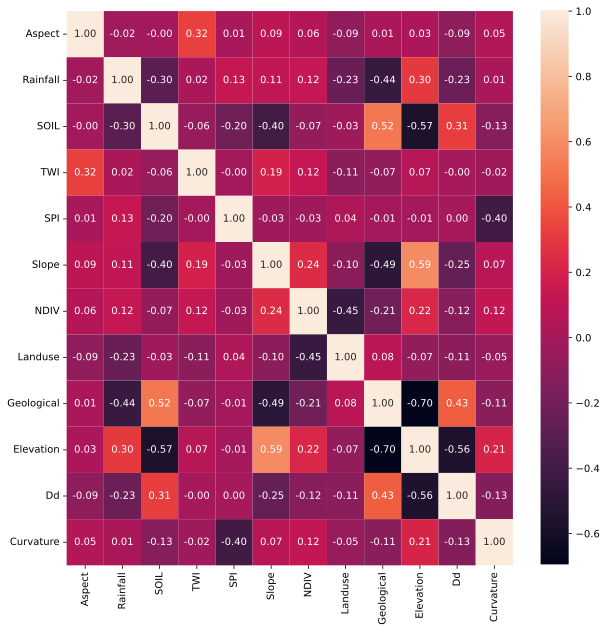

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True,fmt='.2f')
plt.show()

In [14]:
sns.pairplot(train_ds,hue='Training')
plt.show()

In [ ]:
sns.pairplot(test_ds,hue='Testing')
plt.show()

In [ ]:
def validation(y_test,y_pred):
  r2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  print(f'R2 score:{r2} MAE:{mae} RMSE:{rmse}')


In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(X_train)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(X_train)
plt.show()

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

In [ ]:
ann.summary()

In [ ]:
ann.compile(optimizer='adam',loss='mse')

In [ ]:
r = ann.fit(X_train,y_train,epochs=100)

In [ ]:
y_pred = ann.predict(X_train)

In [ ]:
validation(y_train,y_pred)

In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
validation(y_test,y_pred)

In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
validation(y_test,y_pred)

In [ ]:
ann.evaluate(X_train,y_train)

In [ ]:
n_sample,n_features = X_train.shape
print(n_sample,n_features)

In [ ]:
X_train_reshaped = X_train.reshape((n_sample,n_features,1))

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=3,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1),

])

In [ ]:
cnn.summary()

In [ ]:
cnn.compile(optimizer='adam',loss='mse')

In [ ]:
r = cnn.fit(X_train_reshaped,y_train,epochs=100)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')

In [ ]:
y_pred = cnn.predict(X_train_reshaped)

In [ ]:
validation(y_train,y_pred)

In [ ]:
n_sample,n_features = X_test.shape
X_test_reshaped = X_test.reshape((n_sample,n_features,1))
y_pred = cnn.predict(X_test_reshaped)
validation(y_test,y_pred)

In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
gru.summary()

In [ ]:
gru.compile(optimizer='adam',loss='mse')

In [ ]:
r = gru.fit(X_train_reshaped,y_train,epochs=100)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')

In [ ]:
y_pred = gru.predict(X_train_reshaped)
validation(y_train,y_pred)

In [ ]:
y_pred = gru.predict(X_test_reshaped)
validation(y_test,y_pred)

In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
lstm.summary()

In [ ]:
lstm.compile(optimizer='adam',loss='mse')

In [ ]:
r = lstm.fit(X_train_reshaped,y_train,epochs=100)

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')

In [ ]:
y_pred = lstm.predict(X_train_reshaped)
validation(y_train,y_pred)

In [ ]:
y_pred = lstm.predict(X_test_reshaped)
validation(y_test,y_pred)

In [ ]:

ann2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
print(ann2.summary())
ann2.compile(optimizer='adam',loss='binary_crossentropy')
r = ann2.fit(X_train,y_train,epochs=200)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')

y_pred = ann2.predict(X_train)
validation(y_train,y_pred)

In [ ]:

ann3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
print(ann3.summary())
ann3.compile(optimizer='adam',loss='binary_crossentropy')
r = ann3.fit(X_train,y_train,epochs=200)
plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')

y_pred = ann3.predict(X_train)
validation(y_train,y_pred)